In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
# Step 2: Load dataset
df = pd.read_csv("/content/archive (2).zip")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Step 3: Basic info
df.info()
df.describe()
df.isnull().sum()   # Check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
# Step 4: Handle duplicates & missing values
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))  # (No missing values in this dataset, but good practice)


In [ ]:
# Step 5: Create new derived features (to reach ~15 columns)
df["average_score"] = df[["math score","reading score","writing score"]].mean(axis=1)
df["performance_level"] = np.where(df["average_score"]>=70, "High",
                          np.where(df["average_score"]>=50, "Medium","Low"))
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,performance_level
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,High
1,female,group C,some college,standard,completed,69,90,88,82.333333,High
2,female,group B,master's degree,standard,none,90,95,93,92.666667,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Low
4,male,group C,some college,standard,none,76,78,75,76.333333,High


In [ ]:
# Step 6: Encode categorical data
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,performance_level
0,0,1,1,1,1,72,72,74,72.666667,0
1,0,2,4,1,0,69,90,88,82.333333,0
2,0,1,3,1,1,90,95,93,92.666667,0
3,1,0,0,0,1,47,57,44,49.333333,1
4,1,2,4,1,1,76,78,75,76.333333,0


In [ ]:
# Step 7: Normalize numerical columns
scaler = StandardScaler()
num_cols = ["math score","reading score","writing score","average_score"]
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
# Step 8: Split into train/test
X = df.drop("performance_level", axis=1)
y = df["performance_level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


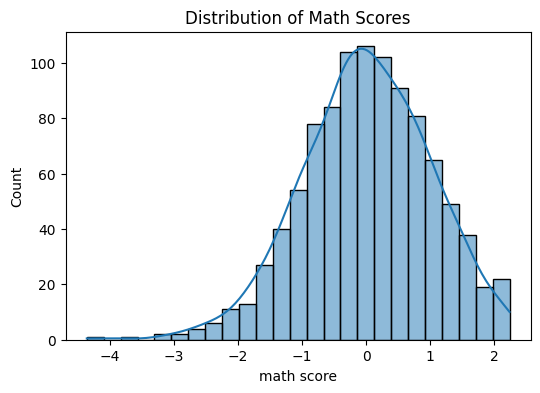

In [ ]:
# 1. Histogram of Math Scores
plt.figure(figsize=(6,4))
sns.histplot(df["math score"], kde=True)
plt.title("Distribution of Math Scores")
plt.show()


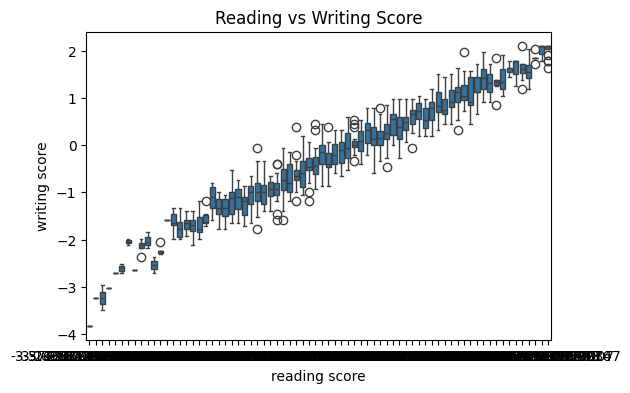

In [ ]:
# 2. Boxplot for Reading vs Writing
plt.figure(figsize=(6,4))
sns.boxplot(x=df["reading score"], y=df["writing score"])
plt.title("Reading vs Writing Score")
plt.show()


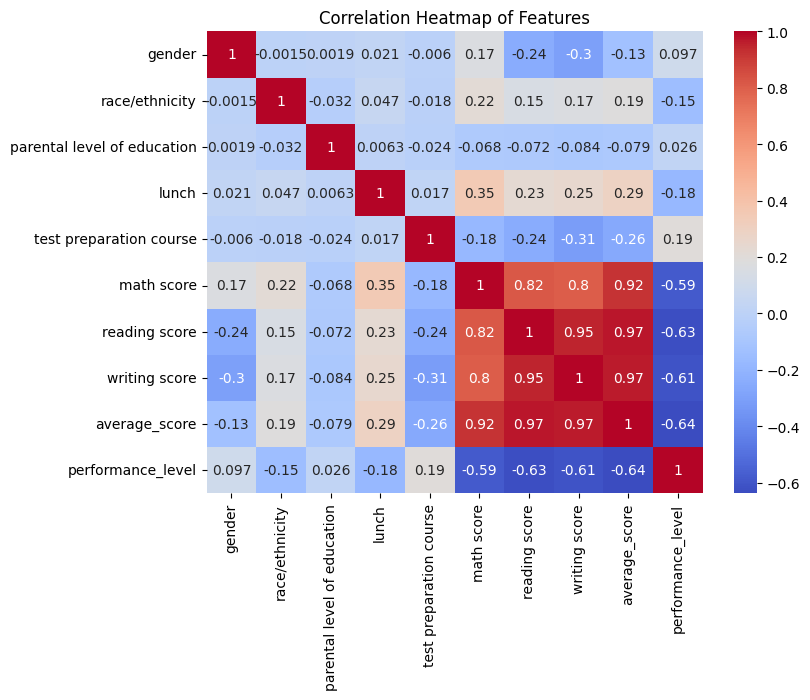

In [ ]:
# 3. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


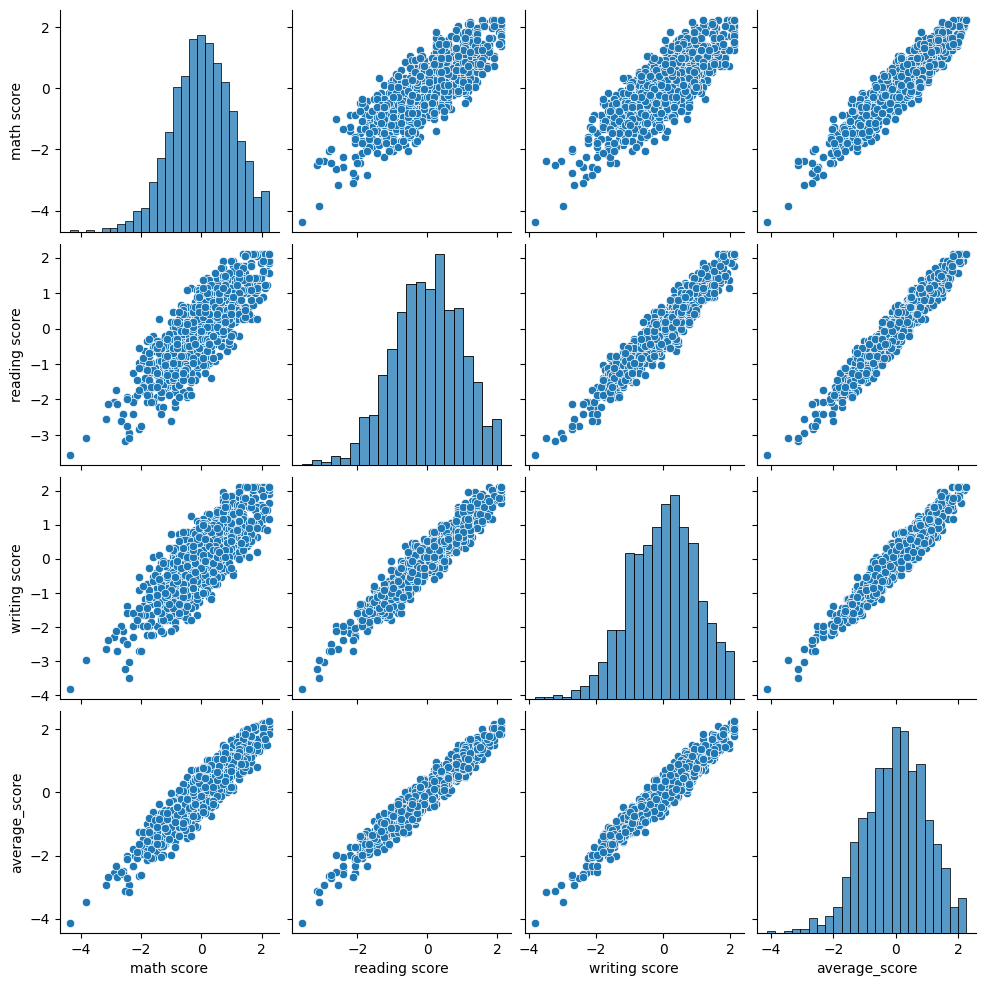

In [ ]:
# 4. Pairplot of main scores
sns.pairplot(df[["math score","reading score","writing score","average_score"]])
plt.show()


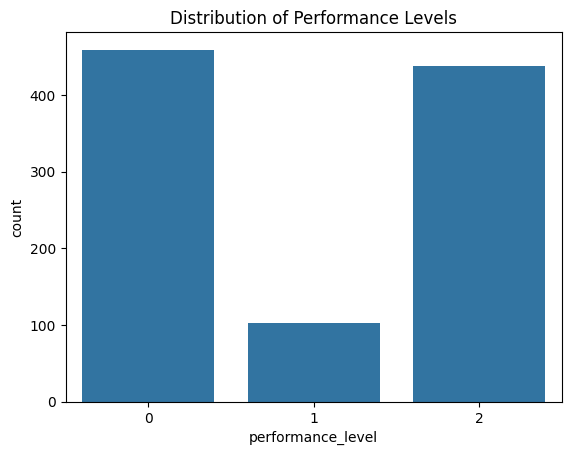

In [ ]:
# 5. Countplot of Performance Levels
sns.countplot(x="performance_level", data=df)
plt.title("Distribution of Performance Levels")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: High, Medium, Low
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,819 (11.01 KB)

 Trainable params: 2,819 (11.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=8, verbose=1)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5907 - loss: 0.8668 - val_accuracy: 0.8813 - val_loss: 0.4174
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8593 - loss: 0.4002 - val_accuracy: 0.9125 - val_loss: 0.2523
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8551 - loss: 0.3165 - val_accuracy: 0.9563 - val_loss: 0.1810
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9275 - loss: 0.1939 - val_accuracy: 0.9438 - val_loss: 0.1716
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9120 - loss: 0.2107 - val_accuracy: 0.9500 - val_loss: 0.1369
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9320 - loss: 0.1655 - val_accuracy: 0.9563 - val_loss: 0.1332
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9188 - loss: 0.1912 - val_accuracy: 0.9500 - val_loss: 0.1216
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9523 - loss: 0.1392 - val_accuracy: 0.9438 - val_loss:

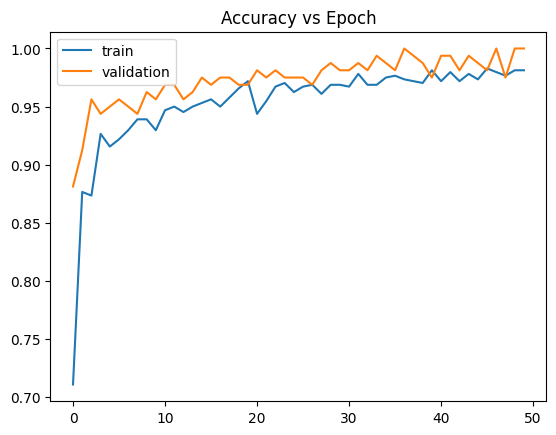

In [ ]:
# Accuracy vs Epoch
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy vs Epoch')
plt.legend()
plt.show()

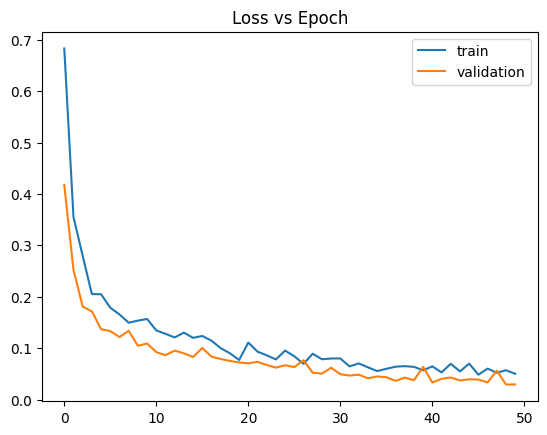

In [ ]:
# Loss vs Epoch
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


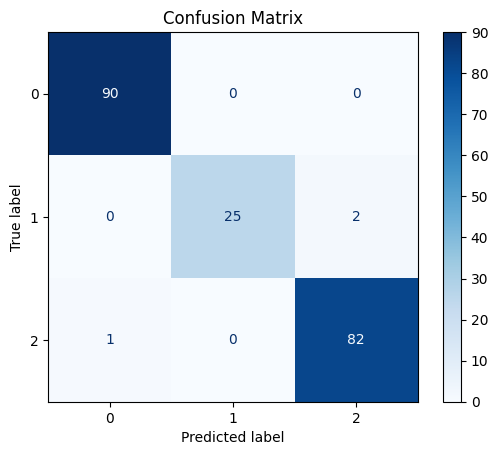

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# --- ROC-AUC for Multiclass Classification ---
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay


In [ ]:
# Binarize the labels (convert 0,1,2 → one-hot format)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

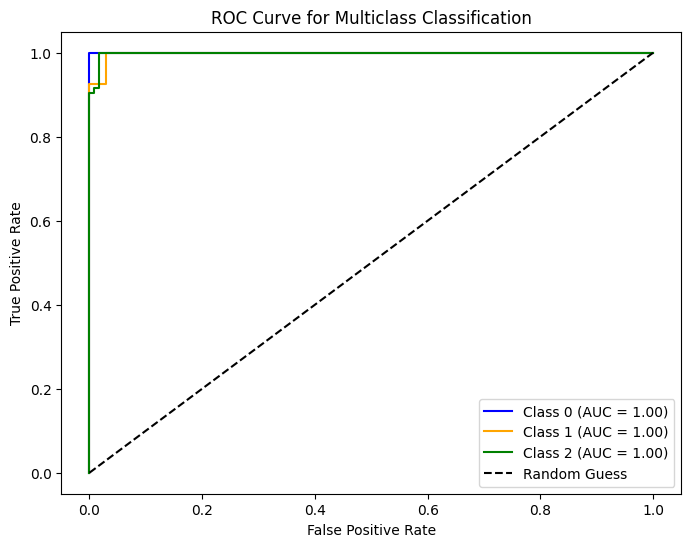

In [ ]:
# Plot all ROC curves
plt.figure(figsize=(8,6))
colors = ['blue', 'orange', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Multiclass Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()